In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
# Make sure to have the CSV file in the same directory or provide the correct path
df = pd.read_csv('data/simple_linear_regression_1000.csv')

In [3]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Hours_Studied  Exam_Score
0       3.745401   68.342517
1       9.507143  118.394709
2       7.319939  105.100383
3       5.986585   92.918777
4       1.560186   48.400816


In [4]:
df.isnull().sum()

Hours_Studied    0
Exam_Score       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  1000 non-null   float64
 1   Exam_Score     1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


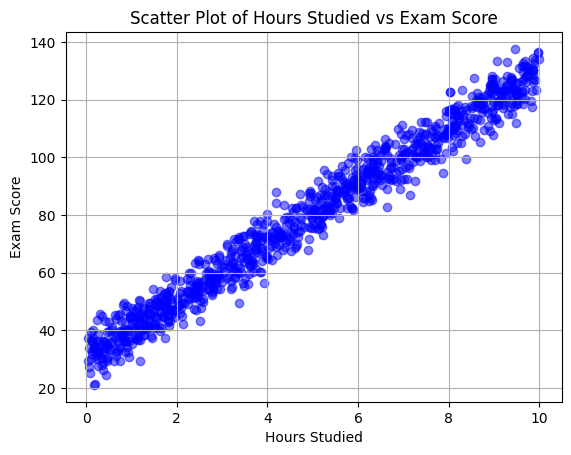

In [6]:
# Plotting the data
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [7]:
# Calculate the correlation between the two variables
print("Correlation between Hours Studied and Exam Score:")
df.corr()

Correlation between Hours Studied and Exam Score:


,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.985791
Exam_Score,0.985791,1.000000


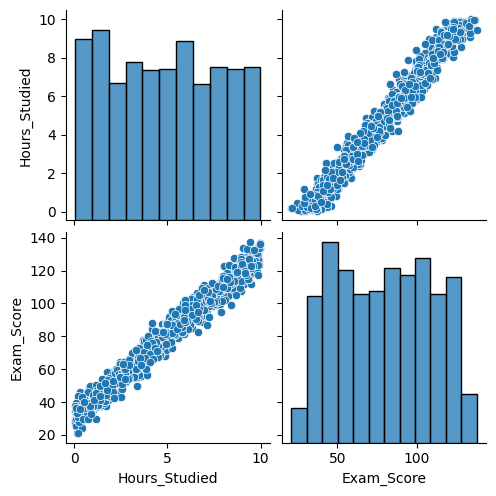

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
# Independent and dependent Features
X = df[['Hours_Studied']] # Independent variable must be in 2D array format or DataFrame
y = df['Exam_Score']

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Display the shapes of the training and testing sets
print("Shapes of the training and testing sets:")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Shapes of the training and testing sets:


((750, 1), (250, 1), (750,), (250,))

In [12]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler 

In [13]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
# Standardizing the training data using fit_transform as it calculates the mean and std deviation for training and same for testing
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.56730394],
       [ 0.67712769],
       [ 1.54114208],
       [ 0.5860993 ],
       [ 0.86928202],
       [-0.74163501],
       [-1.18466895],
       [-0.69192642],
       [ 1.36076675],
       [-1.16558977],
       [ 1.0871907 ],
       [-0.41688868],
       [-0.23672089],
       [ 0.68506113],
       [ 0.30454611],
       [ 1.24868325],
       [ 0.68381287],
       [-1.29499237],
       [ 1.36300595],
       [ 0.68410822],
       [-0.14054646],
       [ 1.35394858],
       [-0.98808566],
       [-0.69198412],
       [ 1.18141012],
       [ 0.72288284],
       [ 0.78405489],
       [-1.39577293],
       [ 0.43289807],
       [-0.51668509],
       [-1.25834034],
       [ 0.23393544],
       [-1.09335852],
       [-1.59486329],
       [ 0.66754548],
       [ 1.60183684],
       [ 0.26930849],
       [-1.41356659],
       [-0.35453977],
       [ 0.35497105],
       [-1.23095483],
       [ 1.48926754],
       [ 0.13461029],
       [ 1.59207303],
       [-0.13166595],
       [-0

In [15]:
X_test

array([[-3.96295345e-01],
       [ 1.09411658e+00],
       [-1.16523038e-01],
       [-4.81107693e-01],
       [ 1.55064682e+00],
       [ 1.61703663e+00],
       [-1.17019271e-01],
       [ 1.26331776e+00],
       [-1.47442728e+00],
       [ 7.54131847e-02],
       [ 1.17039273e+00],
       [ 9.39061064e-01],
       [ 1.22709467e-01],
       [-9.63955891e-01],
       [-1.29640765e+00],
       [-1.40669853e+00],
       [ 1.34521339e+00],
       [-1.34307404e+00],
       [-6.32898414e-01],
       [-8.43197892e-01],
       [ 9.42646073e-01],
       [ 5.07723906e-01],
       [-1.63686363e+00],
       [-7.63961076e-01],
       [ 1.77838650e-01],
       [ 7.72070380e-01],
       [ 4.77750766e-01],
       [ 6.55597790e-01],
       [-1.07856499e+00],
       [ 1.37946551e+00],
       [ 4.73246573e-01],
       [ 1.62494400e+00],
       [-9.83081003e-01],
       [ 1.67429958e+00],
       [-1.35446683e+00],
       [ 1.33522876e+00],
       [-7.41480409e-01],
       [ 4.67456088e-01],
       [-1.6

In [16]:
# Applying Simple Linear Regression
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression(n_jobs=1) # n_jobs=1 means using one core for computation
# Fit the model on the training data
model.fit(X_train, y_train)
# Display the coefficients
print("Coefficients:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)
# Making predictions on the test set
y_pred = model.predict(X_train)
# Display the first few predictions
print("First few predictions:")
print(y_pred[:5])

Coefficients:
[29.00437844]
Intercept:
80.2381932283001
First few predictions:
[ 63.78389505  99.8778611  124.93806123  97.23763928 105.45117791]


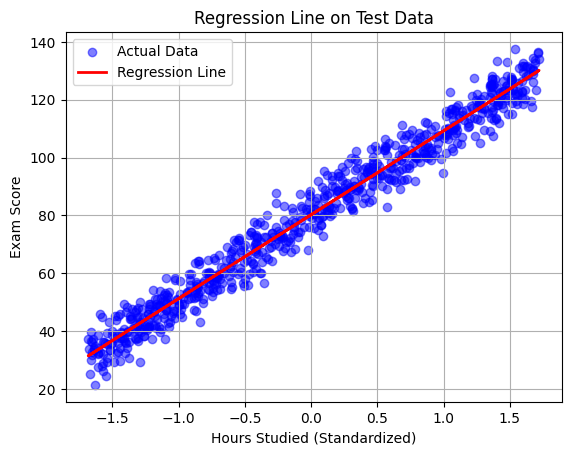

In [17]:
# Plotting the regression line
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Data')
plt.xlabel('Hours Studied (Standardized)')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Predicting on the test set
y_pred_test = model.predict(X_test)

In [19]:
## Performance Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate the Mean Squared Error, R-squared, and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
# Display the performance metrics
print("Performance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Performance Metrics:
Mean Squared Error: 21.119571095075834
R-squared: 0.9751218640328666
Mean Absolute Error: 3.5805925511430288
Root Mean Squared Error: 4.595603452766115


In [20]:
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.975021548968483


In [21]:
## OLS Estimation
import statsmodels.api as sm

In [22]:
regression = sm.OLS(y_train, X_train).fit()

In [23]:
predict_test = regression.predict(X_test)
print(predict_test[:5])

[-11.49430015  31.73417146  -3.37967828 -13.95422961  44.97554726]


In [24]:
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:             Exam_Score   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.114
Method:                 Least Squares   F-statistic:                              97.48
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                    1.07e-21
Time:                        20:22:57   Log-Likelihood:                         -4354.4
No. Observations:                 750   AIC:                                      8711.
Df Residuals:                     749   BIC:                                      8715.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# Predicting on the new data
hours = model.predict(scaler.transform([[6.095643339798968]]))  # Predicting for 5 hours studied

In [26]:
print(hours)
print(f"Predicted Exam Score for 6.095643339798968 hours studied: {hours[0]}")


[91.43154559]
Predicted Exam Score for 6.095643339798968 hours studied: 91.43154558606096


In [31]:
print(model.predict(scaler.transform([[7]])))  # Predicting for 0 hours studied

[100.40404642]
